In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv("winequality.csv")

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
352,7.7,0.665,0.00,2.4,0.090,8.0,19.0,0.99740,3.27,0.73,9.3,5
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4,6
247,8.2,0.600,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45,9.3,5
820,7.0,0.685,0.00,1.9,0.099,9.0,22.0,0.99606,3.34,0.60,9.7,5


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

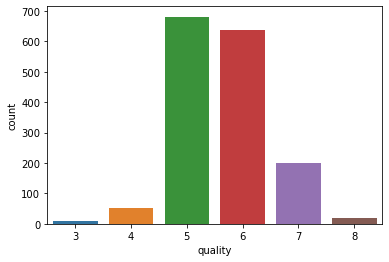

In [11]:
sns.countplot(x='quality',data=df)

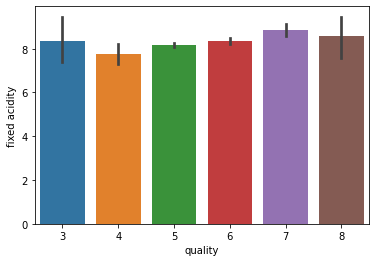

In [12]:
sns.barplot(x='quality', y ='fixed acidity',data=df)

plt.show()

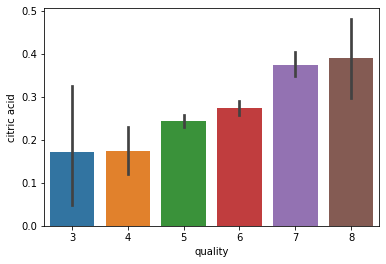

In [13]:
sns.barplot(x='quality', y ='citric acid',data=df)

plt.show()

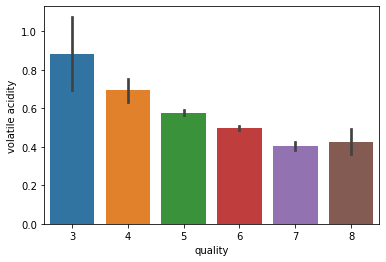

In [14]:
sns.barplot(x='quality', y ='volatile acidity',data=df)

plt.show()

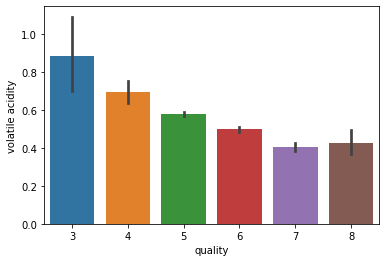

In [15]:
sns.barplot(x='quality', y ='volatile acidity',data=df)

plt.show()

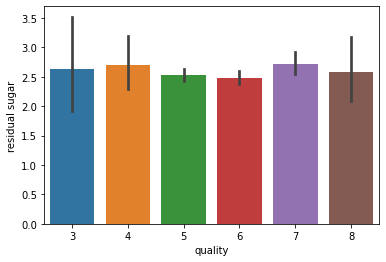

In [16]:
sns.barplot(x='quality', y ='residual sugar',data=df)

plt.show()

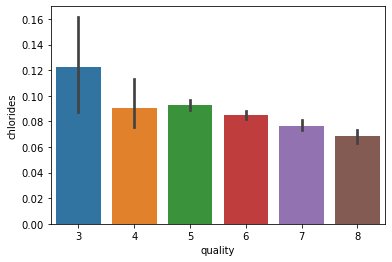

In [17]:
sns.barplot(x='quality', y ='chlorides',data=df)

plt.show()

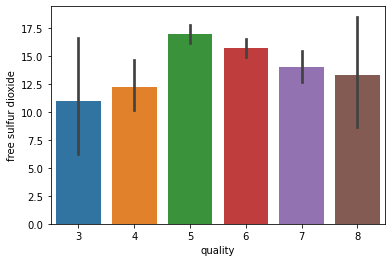

In [18]:
sns.barplot(x='quality', y ='free sulfur dioxide',data=df)

plt.show()

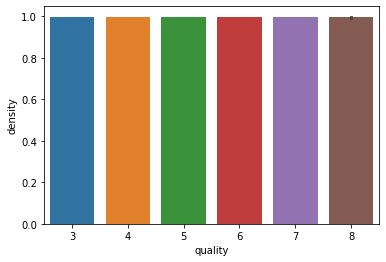

In [19]:
sns.barplot(x='quality', y ='density',data=df)

plt.show()

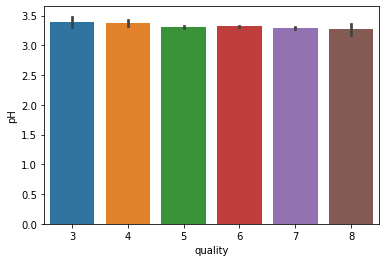

In [20]:
sns.barplot(x='quality', y ='pH',data=df)

plt.show()

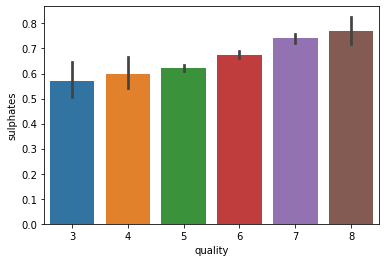

In [21]:
sns.barplot(x='quality', y ='sulphates',data=df)

plt.show()

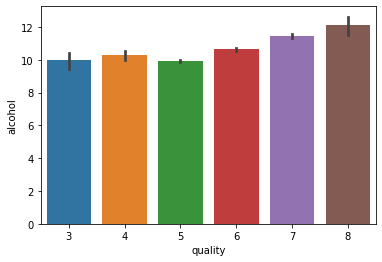

In [22]:
sns.barplot(x='quality', y ='alcohol',data=df)

plt.show()

from above observations we can state that citric acid is directly propotional towards the quality whereas volatile acidity is inversly proportional

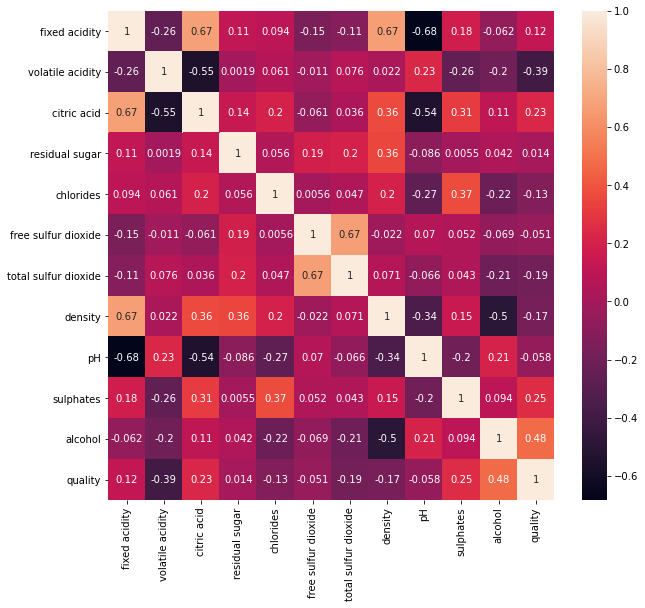

In [23]:
corr=df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr,annot=True,linecolor='Black')
plt.show()

as volatile acidity is having a negative impact on quality so we are removing it

In [24]:
df.drop(['volatile acidity'],inplace=True,axis=1)

In [25]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

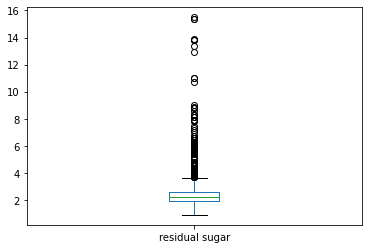

In [26]:
df['residual sugar'].plot.box()

<AxesSubplot:>

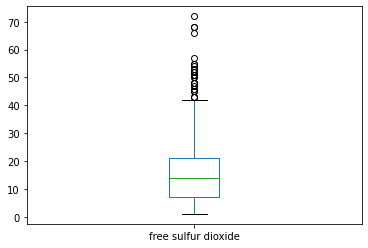

In [27]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

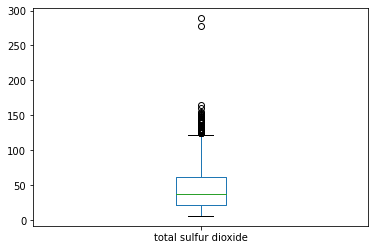

In [28]:
df['total sulfur dioxide'].plot.box()

In [29]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
x=df.iloc[:,:-1]
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
y=df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [32]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variambles']=x.columns
    vif['VIf']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [33]:
calc_vif(x)

,variambles,VIf
0,fixed acidity,70.255473
1,citric acid,6.519083
2,residual sugar,4.642636
3,chlorides,6.046994
4,free sulfur dioxide,6.238337
5,total sulfur dioxide,6.187421
6,density,1479.193049
7,pH,1056.134345
8,sulphates,20.852772
9,alcohol,124.290144


we can see that density and ph are heavily corelated,so we can drop those columns

In [34]:
x1=df.drop(['density','pH'],axis=1,inplace=True)

In [35]:
df

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
1,7.8,0.00,2.6,0.098,25.0,67.0,0.68,9.8,5
2,7.8,0.04,2.3,0.092,15.0,54.0,0.65,9.8,5
3,11.2,0.56,1.9,0.075,17.0,60.0,0.58,9.8,6
4,7.4,0.00,1.9,0.076,11.0,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.58,10.5,5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.76,11.2,6
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.75,11.0,6
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.71,10.2,5


In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1599, 9)

In [37]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   57,
         81,   81,   83,   86,   88,   91,   92,  106,  106,  109,  142,
        144,  147,  151,  151,  151,  163,  164,  169,  169,  181,  226,
        226,  240,  243,  244,  258,  258,  274,  281,  291,  324,  325,
        339,  340,  347,  354,  374,  381,  391,  396,  396,  400,  400,
        442,  451,  459,  467,  480,  494,  515,  517,  544,  554,  555,
        557,  568,  584,  588,  591,  595,  614,  636,  639,  649,  649,
        651,  652,  652,  652,  672,  684,  690,  692,  692,  723,  730,
        754,  776,  777,  795,  821,  832,  899,  911,  917,  923,  925,
        926,  982, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081, 1081,
       1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260,
       1269, 1270, 1288, 1289, 1295, 1296, 1299, 1319, 1319, 1358, 1367,
       1370, 1370, 1372, 1372, 1374, 1374, 1434, 1434, 1435, 1435, 1469,
       1474, 1474, 1476, 1476, 1478, 1493, 1496, 1

In [38]:
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(1599, 9)
(1472, 9)


In [39]:
data_loss=((1599-1467)/1599*100)

In [40]:
data_loss

8.25515947467167

In [41]:
df.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

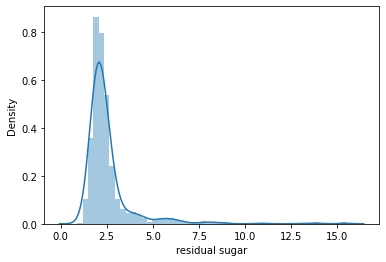

In [42]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

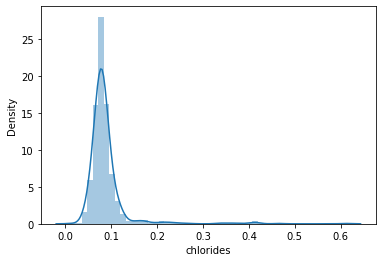

In [43]:
sns.distplot(df['chlorides'])

In [44]:
df['residual sugar']=np.log(df['residual sugar'])
df['chlorides']=np.log(df['chlorides'])

In [45]:
df.skew()

fixed acidity           0.982751
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

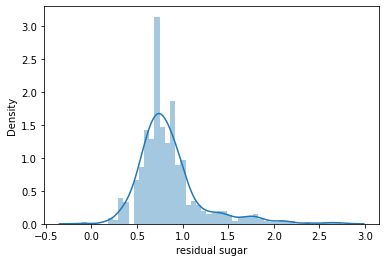

In [46]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

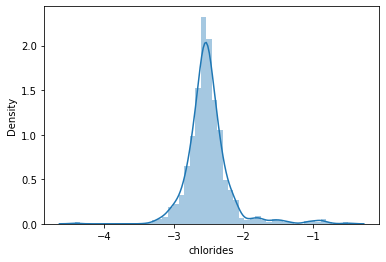

In [47]:
sns.distplot(df['chlorides'])

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [49]:
x=new_df.iloc[:,:-1]

In [50]:
x

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,7.4,0.00,1.9,0.076,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,0.090,32.0,44.0,0.58,10.5
1595,5.9,0.10,2.2,0.062,39.0,51.0,0.76,11.2
1596,6.3,0.13,2.3,0.076,29.0,40.0,0.75,11.0
1597,5.9,0.12,2.0,0.075,32.0,44.0,0.71,10.2


In [51]:
y=new_df.iloc[:,-1]

In [52]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1472, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [55]:
trainx.value_counts()

fixed acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  sulphates  alcohol
10.7           0.53         2.6             0.070      5.0                  16.0                  0.65       11.0       18
7.2            0.46         2.1             0.074      24.0                 44.0                  0.85       11.0        9
12.8           0.66         5.8             0.083      7.0                  42.0                  0.73       10.0        5
11.1           0.53         2.2             0.060      3.0                  10.0                  0.83       10.9        5
6.8            0.32         1.8             0.067      4.0                  8.0                   0.55       12.8        5
                                                                                                                        ..
7.6            0.00         2.1             0.068      30.0                 35.0                  0.65       11.4        1
               0.02   

In [56]:
trainy.value_counts()

4    622
6    622
8    622
5    622
7    622
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

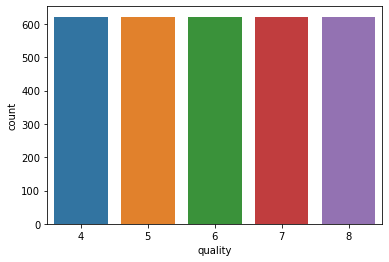

In [57]:
sns.countplot(trainy)

In [58]:
x.shape

(1472, 8)

In [59]:
x.shape[1]

8

In [60]:
lg=LogisticRegression()

In [61]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=43,test_size=0.2)
   
    

In [62]:
lg.fit(trainx,trainy)

LogisticRegression()

In [63]:
lg.score(trainx,trainy)
predlg=lg.predict(x_test)
print(round(accuracy_score(y_test,predlg),2))


0.45


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(trainx,trainy)
dtc.score(trainx,trainy)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[132   0   0   0   0]
 [  0 123   0   0   0]
 [  0   0 101   0   0]
 [  0   0   0 138   0]
 [  0   0   0   0 128]]
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       132
           5       1.00      1.00      1.00       123
           6       1.00      1.00      1.00       101
           7       1.00      1.00      1.00       138
           8       1.00      1.00      1.00       128

    accuracy                           1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622



In [66]:
from sklearn.svm import SVC

In [67]:
svc=SVC()
svc.fit(trainx,trainy)
svc.score(trainx,trainy)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.4212218649517685
[[59 20 44  6  3]
 [12 47 53  2  9]
 [ 6 15 52 10 18]
 [13  8 47 19 51]
 [ 3  8 17 15 85]]
              precision    recall  f1-score   support

           4       0.63      0.45      0.52       132
           5       0.48      0.38      0.43       123
           6       0.24      0.51      0.33       101
           7       0.37      0.14      0.20       138
           8       0.51      0.66      0.58       128

    accuracy                           0.42       622
   macro avg       0.45      0.43      0.41       622
weighted avg       0.46      0.42      0.41       622



In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(trainx,trainy)
knn.score(trainx,trainy)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8697749196141479
[[129   2   1   0   0]
 [ 14  89  13   2   5]
 [  7   6  67  13   8]
 [  0   1   3 131   3]
 [  0   0   3   0 125]]
              precision    recall  f1-score   support

           4       0.86      0.98      0.91       132
           5       0.91      0.72      0.81       123
           6       0.77      0.66      0.71       101
           7       0.90      0.95      0.92       138
           8       0.89      0.98      0.93       128

    accuracy                           0.87       622
   macro avg       0.86      0.86      0.86       622
weighted avg       0.87      0.87      0.87       622



In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(accuracy_score(y_test,predrf))

              precision    recall  f1-score   support

           4       0.93      0.97      0.95       132
           5       0.86      0.76      0.81       123
           6       0.68      0.68      0.68       101
           7       0.86      0.90      0.88       138
           8       0.95      0.98      0.97       128

    accuracy                           0.87       622
   macro avg       0.86      0.86      0.86       622
weighted avg       0.87      0.87      0.87       622

[[128   1   3   0   0]
 [  6  94  21   2   0]
 [  3  12  69  15   2]
 [  0   2   8 124   4]
 [  0   0   0   3 125]]
0.8681672025723473


In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
mlp=MLPClassifier()
mlp.fit(x_train,y_train)
mlp.score(x_train,y_train)
predmlp=mlp.predict(x_test)
print(classification_report(y_test,predmlp))
print(confusion_matrix(y_test,predmlp))
print(accuracy_score(y_test,predmlp))

              precision    recall  f1-score   support

           4       0.67      0.77      0.72       132
           5       0.69      0.41      0.52       123
           6       0.34      0.42      0.38       101
           7       0.70      0.55      0.62       138
           8       0.67      0.86      0.75       128

    accuracy                           0.61       622
   macro avg       0.61      0.60      0.60       622
weighted avg       0.63      0.61      0.61       622

[[102  10  18   2   0]
 [ 28  51  35   5   4]
 [ 18  13  42  10  18]
 [  5   0  25  76  32]
 [  0   0   3  15 110]]
0.612540192926045


In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(classification_report(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(accuracy_score(y_test,predmnb))

              precision    recall  f1-score   support

           4       0.15      0.03      0.05       132
           5       0.42      0.42      0.42       123
           6       0.25      0.28      0.26       101
           7       0.24      0.10      0.14       138
           8       0.32      0.76      0.45       128

    accuracy                           0.31       622
   macro avg       0.28      0.32      0.27       622
weighted avg       0.28      0.31      0.26       622

[[ 4 29 17 16 66]
 [13 52 23  5 30]
 [ 4 25 28 11 33]
 [ 4 10 35 14 75]
 [ 1  8 10 12 97]]
0.3135048231511254


In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.4855305466237942
[[121   5   6   0   0]
 [ 90  19   9   4   1]
 [ 41  15  18  22   5]
 [ 21   6  23  37  51]
 [  0   1  10  10 107]]
              precision    recall  f1-score   support

           4       0.44      0.92      0.60       132
           5       0.41      0.15      0.22       123
           6       0.27      0.18      0.22       101
           7       0.51      0.27      0.35       138
           8       0.65      0.84      0.73       128

    accuracy                           0.49       622
   macro avg       0.46      0.47      0.42       622
weighted avg       0.47      0.49      0.43       622



checking different algorithms for cross-val score 

In [78]:
from sklearn.model_selection import cross_val_score
predrf=rf.predict(x_test)
lss=accuracy_score(y_test,predrf)
for j in range(2,10):
    lsscore=cross_val_score(rf,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:",j)
    print("cross validation score is :",lsc*100)
    print("accuracy score is:",lss*100)
    print("\n")

at cv: 2
cross validation score is : 55.36684782608696
accuracy score is: 86.81672025723472


at cv: 3
cross validation score is : 55.77386147941866
accuracy score is: 86.81672025723472


at cv: 4
cross validation score is : 56.114130434782616
accuracy score is: 86.81672025723472


at cv: 5
cross validation score is : 57.61259079903147
accuracy score is: 86.81672025723472


at cv: 6
cross validation score is : 56.11664177866268
accuracy score is: 86.81672025723472


at cv: 7
cross validation score is : 56.73179224296353
accuracy score is: 86.81672025723472


at cv: 8
cross validation score is : 57.065217391304344
accuracy score is: 86.81672025723472


at cv: 9
cross validation score is : 55.63910086953629
accuracy score is: 86.81672025723472




In [79]:
from sklearn.model_selection import cross_val_score
predmlp=mlp.predict(x_test)
lss=accuracy_score(y_test,predmlp)
for j in range(2,10):
    lsscore=cross_val_score(mlp,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:",j)
    print("cross validation score is :",lsc*100)
    print("accuracy score is:",lss*100)
    print("\n")

at cv: 2
cross validation score is : 48.02989130434783
accuracy score is: 61.2540192926045


at cv: 3
cross validation score is : 49.38830929520484
accuracy score is: 61.2540192926045


at cv: 4
cross validation score is : 49.45652173913044
accuracy score is: 61.2540192926045


at cv: 5
cross validation score is : 50.88273953649256
accuracy score is: 61.2540192926045


at cv: 6
cross validation score is : 47.893921796360814
accuracy score is: 61.2540192926045


at cv: 7
cross validation score is : 53.12215881613308
accuracy score is: 61.2540192926045


at cv: 8
cross validation score is : 52.17391304347826
accuracy score is: 61.2540192926045


at cv: 9
cross validation score is : 50.87743362096197
accuracy score is: 61.2540192926045




In [80]:
from sklearn.model_selection import cross_val_score
predknn=knn.predict(x_test)
lss=accuracy_score(y_test,predknn)
for j in range(2,10):
    lsscore=cross_val_score(knn,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:",j)
    print("cross validation score is :",lsc*100)
    print("accuracy score is:",lss*100)
    print("\n")

at cv: 2
cross validation score is : 42.45923913043478
accuracy score is: 86.97749196141478


at cv: 3
cross validation score is : 41.30207683888219
accuracy score is: 86.97749196141478


at cv: 4
cross validation score is : 43.27445652173913
accuracy score is: 86.97749196141478


at cv: 5
cross validation score is : 43.47215496368039
accuracy score is: 86.97749196141478


at cv: 6
cross validation score is : 41.70787013992589
accuracy score is: 86.97749196141478


at cv: 7
cross validation score is : 43.474223812747844
accuracy score is: 86.97749196141478


at cv: 8
cross validation score is : 42.45923913043478
accuracy score is: 86.97749196141478


at cv: 9
cross validation score is : 43.12268276056994
accuracy score is: 86.97749196141478




In [81]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.49152542 0.46779661 0.46258503 0.33673469 0.41496599]
0.4347215496368039
0.05493399618327638


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge


In [83]:
alphavalue={'alpha':[1,0.1,0.001,0.0001,0.00001]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 1e-05]})
0.5716636236736771
0.001
{'alpha': 0.001}


In [84]:
from sklearn import svm
parameters={'kernel':['linear','rbf'],'C':[1,10]}
clf=GridSearchCV(svc,parameters)
svc=svm.SVC()
clf.fit(x_train,y_train)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [85]:

print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [86]:
sc=svm.SVC(kernel='linear',C=10)
sc.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7287079909173919


In [88]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
rfsscore=cross_val_score(rf,x,y,cv=5)
rfc=rfsscore.mean()
print('cross_val_score',rfc*100)



cross_val_score 59.03931742188401


In [90]:
import pickle
filename='redwine.pkl'
pickle.dump(rf,open(filename,'wb'))